In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Chargement du dataset depuis le dossier data
df = pd.read_csv("../data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Compter le nombre de valeurs égales à 0 pour chaque colonne
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

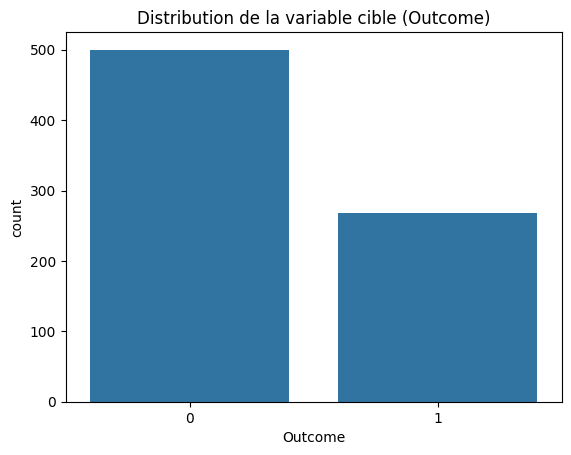

In [10]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution de la variable cible (Outcome)")
plt.show()

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

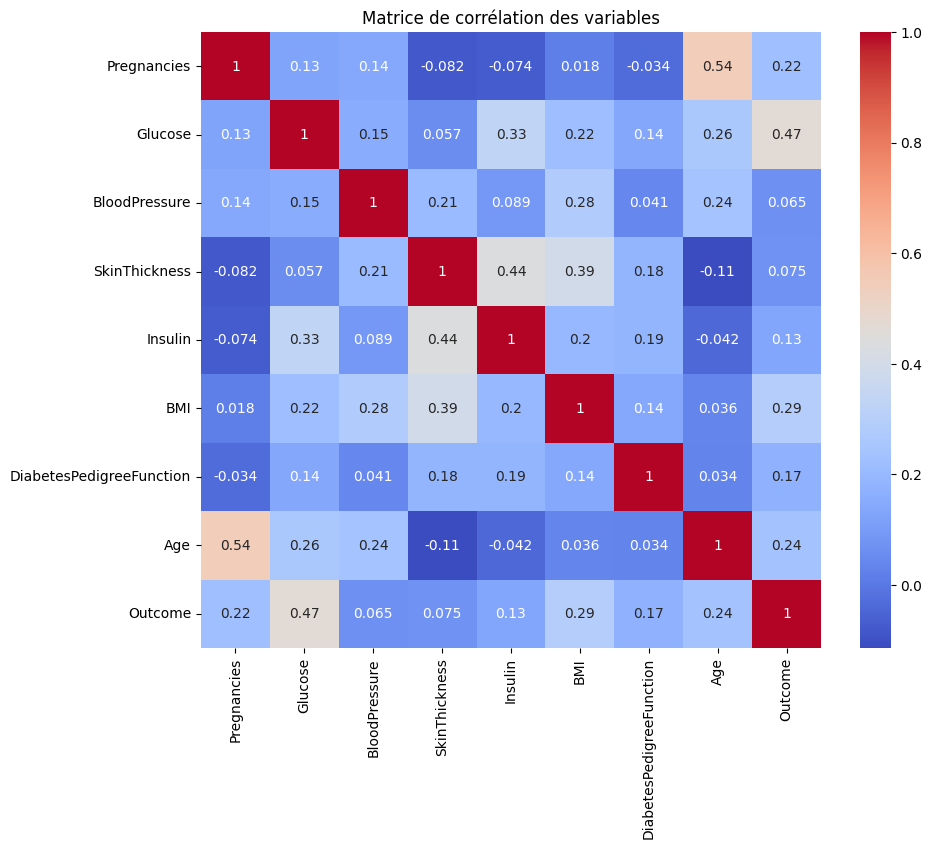

In [12]:
correlation_matrix = df.corr()

# Visualisation de la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables")
plt.show()

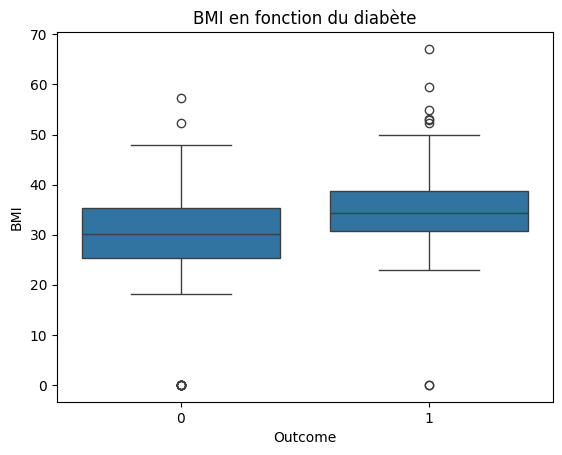

In [15]:
# Comparaison du BMI selon la présence du diabète
plt.figure()
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI en fonction du diabète")
plt.show()       

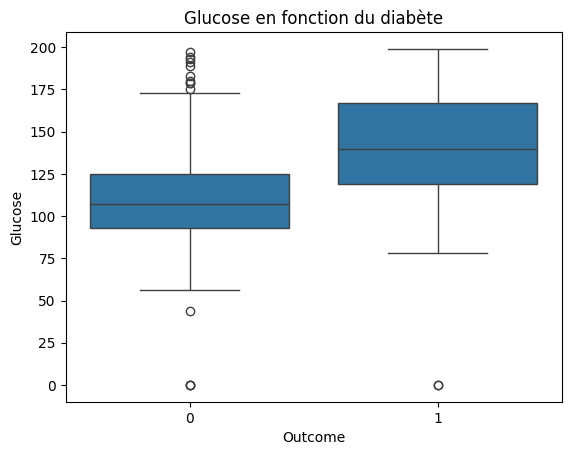

In [13]:
# Comparaison du glucose selon la présence du diabète
plt.figure()
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose en fonction du diabète")
plt.show()

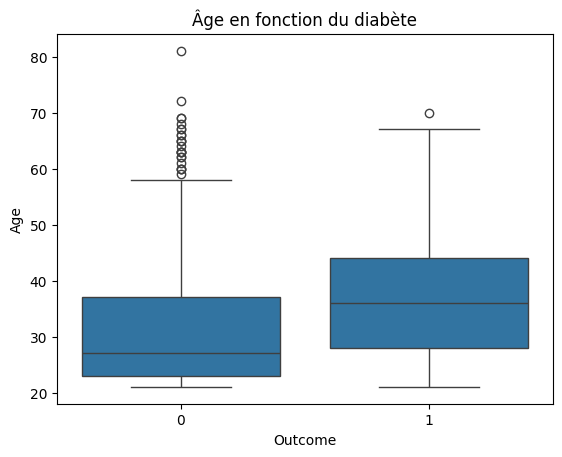

In [16]:
# Comparaison de l'âge selon la présence du diabète
plt.figure()    
sns.boxplot(x="Outcome", y="Age", data=df)
plt.title("Âge en fonction du diabète")
plt.show()

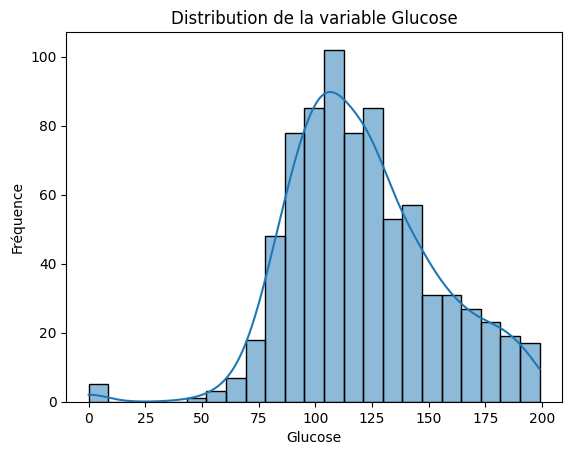

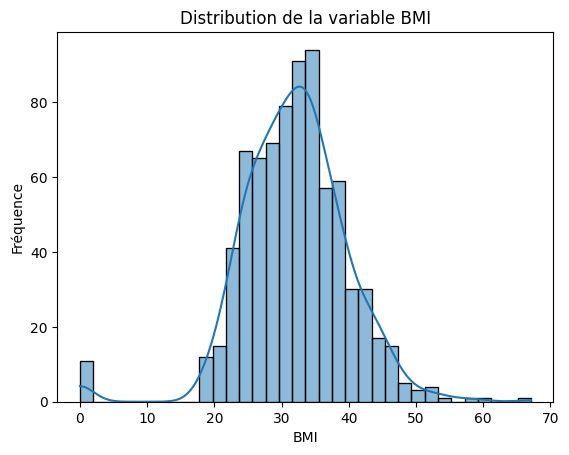

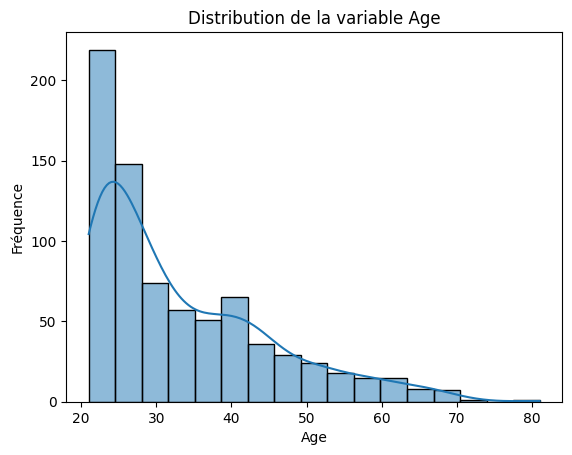

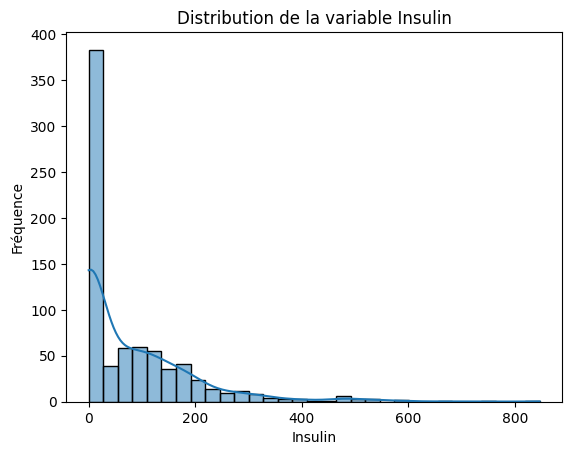

In [14]:
# Liste de variables importantes pour l'analyse
important_features = ["Glucose", "BMI", "Age", "Insulin"]

# Visualisation des distributions
for feature in important_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution de la variable {feature}")
    plt.xlabel(feature)
    plt.ylabel("Fréquence")
    plt.show()

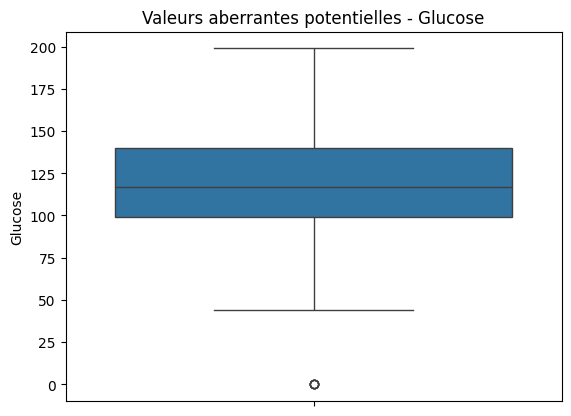

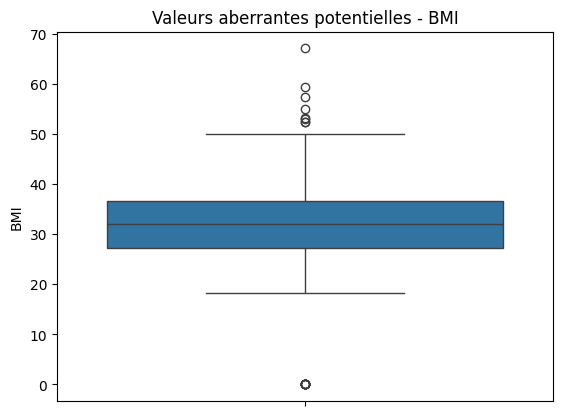

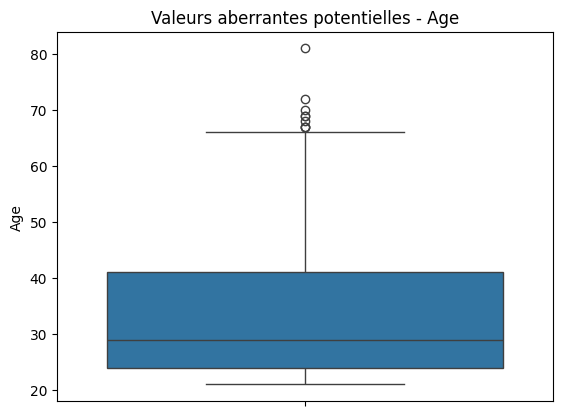

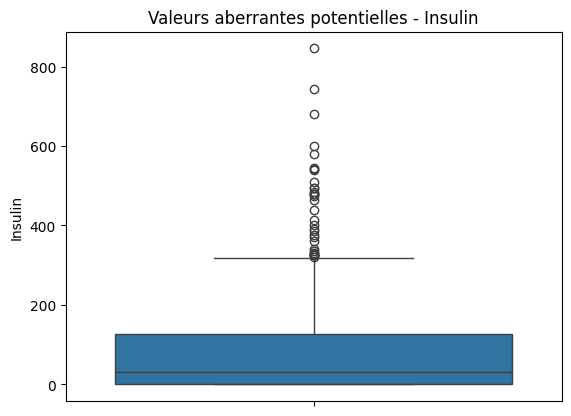

In [17]:
# Détection visuelle des valeurs aberrantes avec des boxplots
for feature in important_features:
    plt.figure()
    sns.boxplot(y=df[feature])
    plt.title(f"Valeurs aberrantes potentielles - {feature}")
    plt.show()

In [18]:
#phase3:préparation des données
# Séparer les variables explicatives (X) et la variable cible (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [20]:
# Vérifier les dimensions
X.shape, y.shape

((768, 8), (768,))

In [22]:
# Colonnes où la valeur 0 n'est pas médicalement logique
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


In [23]:
(X[cols_with_zero] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
import numpy as np

# Remplacer les 0 par NaN
X[cols_with_zero] = X[cols_with_zero].replace(0, np.nan)


In [25]:
# Vérifier les valeurs manquantes après remplacement
X.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [26]:
# Remplacer les valeurs manquantes par la médiane
X.fillna(X.median(), inplace=True)
# Vérifier qu'il n'y a plus de valeurs manquantes
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
#Intégration des données
# Reconstitution d’un dataset propre
df_clean = X.copy()
df_clean["Outcome"] = y

df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Normalisation des variables explicatives
X_scaled = scaler.fit_transform(X)


In [31]:
# Vérification du type
type(X_scaled)

numpy.ndarray

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
# Dimensions finales
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [34]:
# Vérifier qu'il n'y a plus de valeurs manquantes
import pandas as pd
pd.DataFrame(X_train).isnull().sum().sum()

np.int64(0)

In [36]:
#phase4:modélisation
# Modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [37]:
# Dictionnaire des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [38]:
# Entraînement des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entraîné avec succès")


Logistic Regression entraîné avec succès
KNN entraîné avec succès
Decision Tree entraîné avec succès
Random Forest entraîné avec succès


In [41]:
from sklearn.model_selection import cross_val_score

best_model = None
best_model_name = ""
best_score = 0

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    mean_score = scores.mean()
    
    print(f"{name} - Accuracy moyenne (CV) : {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_model_name = name

print("\nMeilleur modèle (validation croisée) :", best_model_name)


Logistic Regression - Accuracy moyenne (CV) : 0.7818
KNN - Accuracy moyenne (CV) : 0.7525
Decision Tree - Accuracy moyenne (CV) : 0.6906
Random Forest - Accuracy moyenne (CV) : 0.7720

Meilleur modèle (validation croisée) : Logistic Regression


In [42]:
#optimisation des hyperparamètres pour la régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleure accuracy (CV) :", grid.best_score_)


Meilleurs paramètres : {'C': 0.1, 'solver': 'liblinear'}
Meilleure accuracy (CV) : 0.7818072770891644


In [43]:
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

print("Modèle final entraîné : Régression Logistique")


Modèle final entraîné : Régression Logistique


In [44]:
import joblib

joblib.dump(final_model, "../models/diabetes_model.pkl")


['../models/diabetes_model.pkl']

In [54]:
# Sauvegarder le scaler
joblib.dump(scaler, "../models/scaler.pkl")

print("Modèle et scaler sauvegardés")

Modèle et scaler sauvegardés


In [45]:
#phase5:évaluation du modèle
# Prédictions sur l'ensemble de test
y_pred = final_model.predict(X_test)



In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.7012987012987013


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[80, 20],
       [26, 28]])

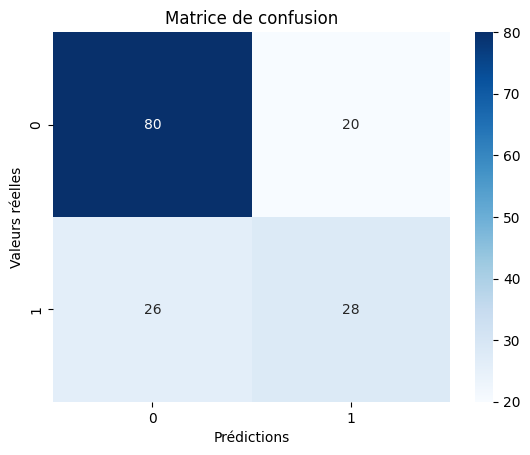

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [51]:
TN, FP, FN, TP = cm.ravel()

# Sensibilité (Recall)
recall = TP / (TP + FN)

# Précision
precision = TP / (TP + FP)

# Spécificité
specificity = TN / (TN + FP)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Taux de faux positifs
fpr = FP / (FP + TN)

# Taux de faux négatifs
fnr = FN / (FN + TP)

print("Recall (Sensibilité) :", recall)
print("Precision :", precision)
print("Specificity :", specificity)
print("F1-score :", f1_score)
print("False Positive Rate :", fpr)
print("False Negative Rate :", fnr)


Recall (Sensibilité) : 0.5185185185185185
Precision : 0.5833333333333334
Specificity : 0.8
F1-score : 0.5490196078431373
False Positive Rate : 0.2
False Negative Rate : 0.48148148148148145


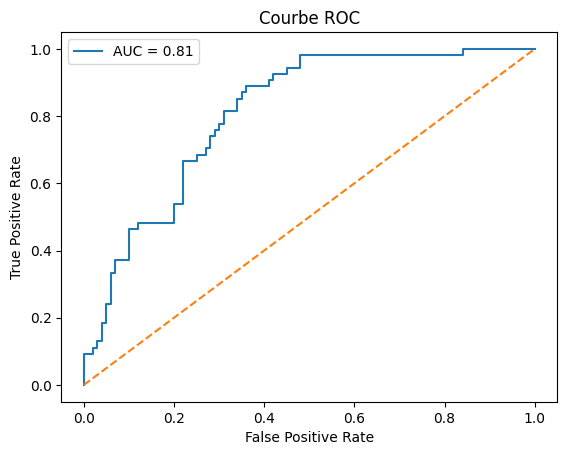

AUC : 0.8096296296296296


In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = final_model.predict_proba(X_test)[:, 1]

fpr_curve, tpr_curve, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr_curve, tpr_curve, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()

print("AUC :", auc_score)


In [53]:
#resume
import pandas as pd

metrics_summary = pd.DataFrame({
    "Metric": [
        "Accuracy", "Precision", "Recall (Sensitivity)",
        "Specificity", "F1-score", "FPR", "FNR", "AUC"
    ],
    "Value": [
        accuracy, precision, recall,
        specificity, f1_score, fpr, fnr, auc_score
    ]
})

metrics_summary


,Metric,Value
0,Accuracy,0.701299
1,Precision,0.583333
2,Recall (Sensitivity),0.518519
3,Specificity,0.800000
4,F1-score,0.549020
5,FPR,0.200000
6,FNR,0.481481
7,AUC,0.809630
